# Exploring the Data


In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST

In [11]:
dataset = MNIST(root = 'data/', download = True)

100.1%

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


113.5%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


100.4%

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


180.4%../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [12]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x112654090>, 5)


In [13]:
test_dataset = MNIST(root = 'data/', train = False)

In [14]:
len(dataset)

60000

In [15]:
len(test_dataset)

10000

Label =  5


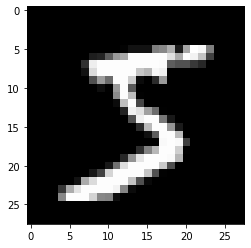

In [22]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label = ", label)

Label =  5


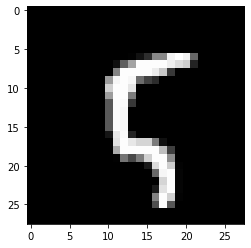

In [23]:
image, label = dataset[100]
plt.imshow(image, cmap='gray')
print("Label = ", label)

In [24]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())


In [25]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [33]:
image_tensor, label = dataset[0]
print(image_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


In [43]:
print(image_tensor[:,10:12,10:14])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529],
         [0.0000, 0.5451, 0.9922, 0.7451]]])
tensor(1.) tensor(0.)


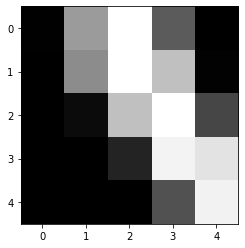

In [45]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

# Training and Validation Datasets


In [46]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [47]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [48]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [50]:
print(model.weight.shape)

torch.Size([10, 784])


In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [52]:
print(model.weight.shape)

AttributeError: 'MnistModel' object has no attribute 'weight'

In [53]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0300,  0.0051,  0.0200,  ..., -0.0059,  0.0178,  0.0094],
         [ 0.0248,  0.0244,  0.0267,  ..., -0.0020,  0.0233, -0.0306],
         [-0.0104, -0.0261, -0.0190,  ...,  0.0175, -0.0271, -0.0082],
         ...,
         [-0.0232, -0.0051, -0.0008,  ..., -0.0319,  0.0342, -0.0280],
         [ 0.0275,  0.0189,  0.0350,  ..., -0.0336,  0.0054,  0.0260],
         [-0.0310,  0.0018,  0.0150,  ...,  0.0351, -0.0212, -0.0018]],
        requires_grad=True), Parameter containing:
 tensor([-0.0205, -0.0011, -0.0228,  0.0286, -0.0078,  0.0193, -0.0329,  0.0010,
          0.0144, -0.0349], requires_grad=True)]

In [54]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.3538, -0.2583, -0.0890,  0.2012,  0.3977, -0.0198, -0.1652,  0.0634,
         -0.4214,  0.1231],
        [-0.3296, -0.0723,  0.0890,  0.1517,  0.1066,  0.0537,  0.0367,  0.0190,
         -0.2582, -0.1458]])


In [55]:
import torch.nn.functional as F


In [57]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:3].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0718, 0.0790, 0.0935, 0.1250, 0.1522, 0.1002, 0.0867, 0.1089, 0.0671,
         0.1156],
        [0.0736, 0.0952, 0.1119, 0.1192, 0.1139, 0.1080, 0.1062, 0.1043, 0.0791,
         0.0885],
        [0.0665, 0.0690, 0.1353, 0.1254, 0.1140, 0.1277, 0.1022, 0.0983, 0.0649,
         0.0967]])
Sum:  1.0


In [58]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 3, 2, 4, 3, 3, 4, 9, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 0, 4, 3, 3, 3, 3,
        9, 3, 3, 9, 6, 6, 4, 4, 3, 9, 3, 4, 2, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3,
        3, 3, 3, 4, 4, 3, 9, 3, 3, 3, 3, 3, 4, 4, 4, 5, 4, 3, 6, 9, 3, 4, 4, 4,
        3, 4, 4, 4, 3, 4, 4, 3, 3, 7, 3, 3, 3, 4, 4, 9, 3, 4, 3, 3, 0, 4, 3, 7,
        3, 4, 9, 0, 3, 3, 3, 7, 5, 3, 3, 2, 3, 4, 3, 3, 9, 3, 4, 3, 3, 3, 3, 3,
        6, 4, 3, 3, 3, 3, 4, 4])
tensor([0.1522, 0.1192, 0.1353, 0.1297, 0.1264, 0.1181, 0.1202, 0.1299, 0.1372,
        0.1303, 0.1264, 0.1467, 0.1337, 0.1263, 0.1329, 0.1158, 0.1223, 0.1427,
        0.1338, 0.1328, 0.1503, 0.1415, 0.1422, 0.1708, 0.1449, 0.1405, 0.1385,
        0.1189, 0.1290, 0.1268, 0.1363, 0.1261, 0.1532, 0.1212, 0.2077, 0.1636,
        0.1337, 0.1333, 0.1302, 0.1390, 0.1441, 0.1422, 0.1610, 0.1435, 0.1278,
        0.1323, 0.1560, 0.1353, 0.1331, 0.1412, 0.1315, 0.1490, 0.1339, 0.1275,
        0.1284, 0.1254, 0.1287, 0.1424, 0.1275, 0.1286, 0.1587, 0.1347, 0.1325,
       

In [59]:
labels


tensor([0, 3, 3, 6, 6, 1, 1, 7, 0, 9, 2, 3, 3, 4, 5, 9, 1, 1, 6, 7, 0, 9, 6, 6,
        7, 4, 0, 4, 7, 7, 8, 8, 9, 7, 2, 5, 5, 0, 6, 7, 5, 8, 0, 3, 2, 1, 0, 6,
        1, 8, 9, 2, 5, 5, 7, 4, 4, 0, 9, 3, 3, 0, 3, 2, 0, 1, 9, 7, 6, 9, 7, 6,
        9, 2, 3, 9, 6, 9, 5, 5, 6, 8, 6, 9, 0, 1, 5, 0, 0, 7, 4, 7, 7, 2, 1, 9,
        0, 2, 7, 6, 0, 6, 9, 7, 3, 9, 4, 3, 9, 2, 0, 6, 7, 5, 2, 6, 0, 6, 1, 9,
        5, 2, 7, 1, 6, 1, 5, 2])

# Evaluation Metric and Loss Function


In [60]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [62]:
accuracy(outputs, labels)

tensor(0.0391)

In [63]:
loss_fn = F.cross_entropy


In [64]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3113, grad_fn=<NllLossBackward>)


# Training the model


In [65]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [67]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [68]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.309373140335083, 'val_acc': 0.09918908029794693}

In [69]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9477, val_acc: 0.6065
Epoch [1], val_loss: 1.6809, val_acc: 0.7292
Epoch [2], val_loss: 1.4805, val_acc: 0.7682
Epoch [3], val_loss: 1.3286, val_acc: 0.7875
Epoch [4], val_loss: 1.2114, val_acc: 0.8006


In [70]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1192, val_acc: 0.8094
Epoch [1], val_loss: 1.0452, val_acc: 0.8161
Epoch [2], val_loss: 0.9846, val_acc: 0.8221
Epoch [3], val_loss: 0.9342, val_acc: 0.8258
Epoch [4], val_loss: 0.8916, val_acc: 0.8302


In [71]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8550, val_acc: 0.8345
Epoch [1], val_loss: 0.8234, val_acc: 0.8370
Epoch [2], val_loss: 0.7957, val_acc: 0.8405
Epoch [3], val_loss: 0.7712, val_acc: 0.8438
Epoch [4], val_loss: 0.7494, val_acc: 0.8471


In [72]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7299, val_acc: 0.8486
Epoch [1], val_loss: 0.7123, val_acc: 0.8511
Epoch [2], val_loss: 0.6963, val_acc: 0.8531
Epoch [3], val_loss: 0.6817, val_acc: 0.8539
Epoch [4], val_loss: 0.6683, val_acc: 0.8554


In [73]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6560, val_acc: 0.8571
Epoch [1], val_loss: 0.6446, val_acc: 0.8581
Epoch [2], val_loss: 0.6340, val_acc: 0.8596
Epoch [3], val_loss: 0.6242, val_acc: 0.8607
Epoch [4], val_loss: 0.6151, val_acc: 0.8620


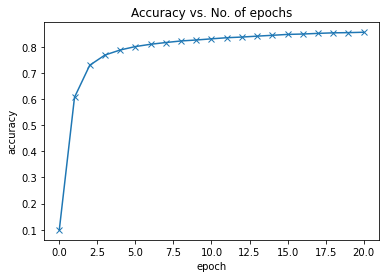

In [74]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [76]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


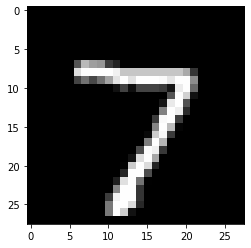

In [77]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [78]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [79]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


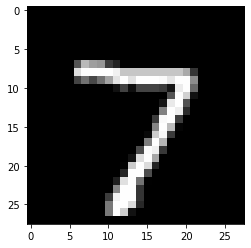

In [80]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


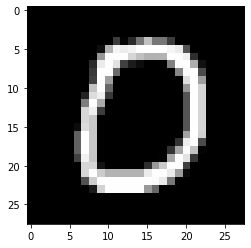

In [81]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


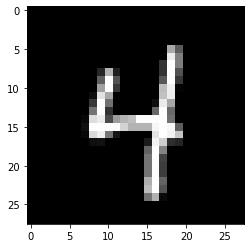

In [87]:
img, label = test_dataset[19]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [82]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5874408483505249, 'val_acc': 0.865917980670929}

# Saving and loading the model

In [83]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [84]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0241,  0.0104, -0.0161,  ...,  0.0213, -0.0315, -0.0332],
                      [-0.0335,  0.0185,  0.0239,  ...,  0.0066, -0.0206, -0.0229],
                      [ 0.0057, -0.0222,  0.0055,  ...,  0.0138, -0.0112,  0.0088],
                      ...,
                      [-0.0039,  0.0095,  0.0347,  ...,  0.0160, -0.0232,  0.0116],
                      [-0.0014,  0.0096, -0.0284,  ..., -0.0270,  0.0039,  0.0248],
                      [-0.0266, -0.0267,  0.0357,  ..., -0.0285,  0.0060,  0.0207]])),
             ('linear.bias',
              tensor([-0.0417,  0.0943, -0.0411, -0.0297,  0.0566,  0.0673, -0.0180,  0.0316,
                      -0.0839,  0.0177]))])

In [85]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0241,  0.0104, -0.0161,  ...,  0.0213, -0.0315, -0.0332],
                      [-0.0335,  0.0185,  0.0239,  ...,  0.0066, -0.0206, -0.0229],
                      [ 0.0057, -0.0222,  0.0055,  ...,  0.0138, -0.0112,  0.0088],
                      ...,
                      [-0.0039,  0.0095,  0.0347,  ...,  0.0160, -0.0232,  0.0116],
                      [-0.0014,  0.0096, -0.0284,  ..., -0.0270,  0.0039,  0.0248],
                      [-0.0266, -0.0267,  0.0357,  ..., -0.0285,  0.0060,  0.0207]])),
             ('linear.bias',
              tensor([-0.0417,  0.0943, -0.0411, -0.0297,  0.0566,  0.0673, -0.0180,  0.0316,
                      -0.0839,  0.0177]))])

In [86]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5874408483505249, 'val_acc': 0.865917980670929}